In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('../Data/titanic_preprocesamiento.csv')
df.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Survived
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0


In [6]:
# Clasificación binaria
# 0 - No sobrevivió
# 1 - Sí sobrevivió
X = df.drop('Survived', axis=1)
X.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0


In [7]:
y = df['Survived']

In [8]:
df['Survived'].value_counts()

Survived
0.0    535
1.0    341
Name: count, dtype: int64

## Regresión logística

* Parte lineal: similar a regresión lineal. Combina linealmente las columnas del dataframe:

z = w0 + w1 * x1 + w2 * x2 + wn * xn

* w0: intercept
* wi: pesos que el modelo aprende

Parte logística (función sigmoide)

sigmoide(z) = 1 / (1 + e ^ -z)

Esto nos da un número entre 0 y 1 que sería la probabilidad de pertecener a la clase 0 o 1. 

P ( clase = 1 | X)

* Si la probabilidad es mayor a 0.5 entonces se clasifica como clase 1. 
* Si la probabilidad es mayor a 0.5 entonces se clasifica como clase 0. 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# LogisticRegression es un algoritmo de clasificación
# https://the-algorithms.com/es/algorithm/logistic-regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000, C=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[99 16]
 [13 48]]


In [25]:
model.classes_

array([0., 1.])

## Matriz de confusión

Convención práctica (scikit learn)

|                   | **Predicho: 0** | **Predicho: 1** |
|-------------------|-----------------|-----------------|
| **Real: 0**       | 98 (TN)         | 17 (FP)         |
| **Real: 1**       | 13 (FN)          | 48 (TP)         |

Convención teórica

|                   | **Predicho: 1** | **Predicho: 0** |
|-------------------|-----------------|-----------------|
| **Real: 1**       | **True Positive (TP)** | **False Negative (FN)** |
| **Real: 0**       | **False Positive (FP)** | **True Negative (TN)** |

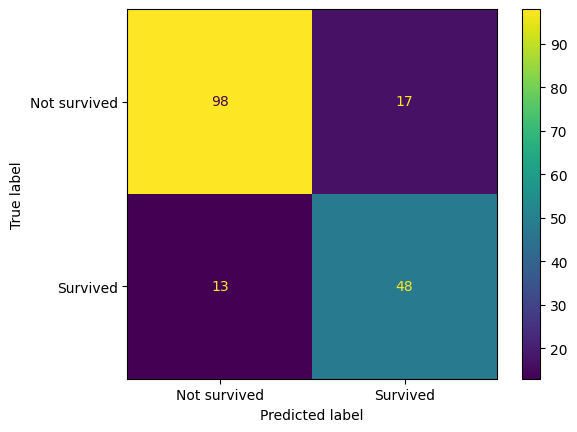

In [33]:
cm = confusion_matrix(y_test, y_pred)
# cmd = ConfusionMatrixDisplay(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not survived', 'Survived'])
cmd.plot();

In [ ]:
from sklearn.metrics import classification_report

# Para la clase 1 (survived) el modelo tiene peores puntuaciones
# support indica el número de registros filas, HAY QUE TENER EN CUENTA QUE HEMOS HECHO PARTICIONAMIENTO 20 %
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       115
         1.0       0.74      0.79      0.76        61

    accuracy                           0.83       176
   macro avg       0.81      0.82      0.81       176
weighted avg       0.83      0.83      0.83       176



### Accuracy: 

Exactitud: porcentaje de muestras que el modelo clasifica correctamente (TN + TP).

accuracy = número de aciertos / número total de muestras

In [24]:
# exactitud, ratio de acierto
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8295454545454546


### Precision

Precisión: De todas las observaciones que el modelo predijo como positivos, ¿cuántos son realmente positivos?

Enfocada en evitar falsos positivos (FP).

Responde: "De los casos que predije como positivos, ¿qué proporción eran realmente positivos?"

Útil cuando los falsos positivos son costosos, como en detección de spam (es preferible no marcar un correo legítimo como spam).

In [26]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7384615384615385

### Recall

Enfocada en evitar falsos negativos (FN).

Responde: "De los casos positivos reales, ¿qué proporción detecté correctamente?"

Útil cuando los falsos negativos son costosos, como en detección de enfermedades (es mejor detectar todos los enfermos, incluso si algunos falsos positivos ocurren).


In [27]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7868852459016393

### f1-score

Media de precision y recall, tiene en cuenta ambas métricas, proporciona un balance entre ambas.

Es la métrica más confiable cuando tenemos datasets desbalanceados.

In [29]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7619047619047619

## ROC-AUC

Curva ilustrar el rendimiento del clasificador en distintos umbrales de decisión:

* TPR: True Positive ratio
* FPR: False Positive ratio

TPR = 1, FPR = 0, lo ideal

AUC: Area Under the curve cuantifica el área debajo de la curva ROC

* AUC = 1 perfecto
* AUC = 0.5 malo, igual que tomar una decisión aleatoria
* AUC < 0.5 peor que aleatorio, posible problema en el modelo

In [35]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(f'AUC {auc}')

AUC 0.8195295794725588


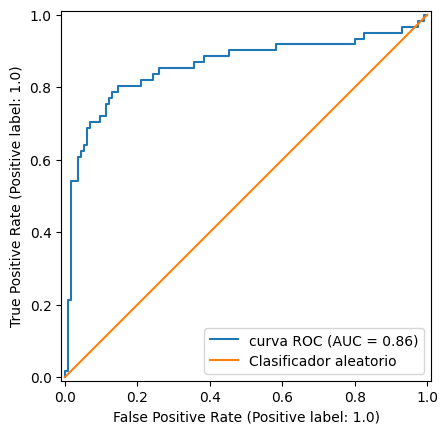

In [39]:
from sklearn.metrics import RocCurveDisplay

# Gráfico que muestra qué tan bien el modelo diferencia entre las clases 
# Eje x: FPR tasa de falsos positivos
# Eje y: TPR tasa de verdaderos positivos
# Nos interesa que la diagonalesté en (0,0)
# FPR si es 0 es ideal, cuanto mayor FPR peor y más curva se hace la línea
# TPR es 1 es ideal
# INTERPRETACIÓN cuanto más cerca de la esquina superior izquierda MEJOR
RocCurveDisplay.from_estimator(model, X_test, y_test, name='curva ROC')
plt.plot([0, 1], [0,1], label='Clasificador aleatorio')
plt.legend()

In [40]:
model.predict(X_test)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1.])

In [41]:
model.predict_proba(X_test)

array([[0.29601929, 0.70398071],
       [0.86462451, 0.13537549],
       [0.69305801, 0.30694199],
       [0.88507228, 0.11492772],
       [0.83085271, 0.16914729],
       [0.09193106, 0.90806894],
       [0.85083728, 0.14916272],
       [0.58630052, 0.41369948],
       [0.90533345, 0.09466655],
       [0.54555842, 0.45444158],
       [0.40678809, 0.59321191],
       [0.37664393, 0.62335607],
       [0.75984866, 0.24015134],
       [0.57412056, 0.42587944],
       [0.77774733, 0.22225267],
       [0.42593744, 0.57406256],
       [0.53718927, 0.46281073],
       [0.58184253, 0.41815747],
       [0.29972861, 0.70027139],
       [0.12298767, 0.87701233],
       [0.84983654, 0.15016346],
       [0.87679291, 0.12320709],
       [0.80946713, 0.19053287],
       [0.33112606, 0.66887394],
       [0.92411016, 0.07588984],
       [0.90129921, 0.09870079],
       [0.8631818 , 0.1368182 ],
       [0.40560219, 0.59439781],
       [0.41977572, 0.58022428],
       [0.8734689 , 0.1265311 ],
       [0.

In [42]:
model.classes_

array([0., 1.])

In [44]:
# una nueva persona, por ejemplo "Pepe"
X_new = pd.DataFrame([[22.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns=X.columns)
X_new

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0


In [45]:
model.predict(X_new) # 0 no sobrevivió

array([0.])

In [46]:
# 87,5 % de probabilidad de que no haya sobrevivido
# 12,42 % de probabilidad de que sí haya sobrevivido
model.predict_proba(X_new) 

array([[0.87577564, 0.12422436]])

In [53]:
model.intercept_

array([3.17225264])

In [54]:
model.coef_

array([[-0.04794293, -1.01686266, -0.35620544, -0.11075366, -0.00186716,
         1.14580793, -1.1421609 ,  0.39581168, -0.10331367,  0.06525725,
        -0.11104905]])

## Comparar modelos clasificación

In [64]:
df_resultados = pd.DataFrame(columns=['Modelo', 'accuracy', 'precision', 'recall', 'f1', 'AUC'])

def calculate_metrics(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    df_resultados.loc[len(df_resultados)] = [name, accuracy, precision, recall, f1, auc]

In [65]:
model = LogisticRegression(max_iter=1000, C=1)
calculate_metrics('RL', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.81953
